# 可视化之特征融合
神经网络特征融合

In [1]:
import os
import numpy as np
import cv2
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
import torch as tc
from random import sample
import utils
from torchvision import models 
import copy

# 一、预处理

### 1.导入原图像

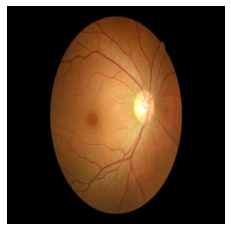

(301, 301, 3)


In [2]:
'''
numpy.fromfile从文本或二进制文件中的数据构造一个数组。
cv2.imdecode()函数从指定的内存缓存中读取数据，并把数据转换(解码)成图像格式
我的评价：意义不大。因为convert_BGR2GRB
-----------------------
事实是如果是中文路径，opencv无法读取。。。。
'''
def cv_imread(filepath):
    cv_img = cv2.imdecode(np.fromfile(filepath, dtype=np.uint8), -1)
    return cv_img

filename=r'D:\党\大四上\319实验室\eye-project\zyw\eye_disease-master\data\data1012\train\1\Ｎ黄婷001.jpg'
a=cv_imread(filename)
img=cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
plt.show()
print(a.shape)

### 2.导入预处理后的图像

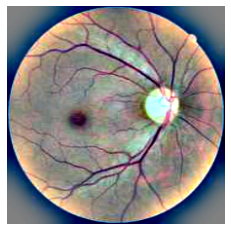

(224, 224, 3)


In [3]:
filename=r'D:\党\大四上\319实验室\eye-project\zyw\eye_disease-master\data\data1012\train\1\Ｎ黄婷001.jpg'
img=utils.pretreatment(filename)
plt.axis('off')
plt.imshow(img)
plt.show()
print(img.shape)

### 3.加载网络格式

In [4]:
img_tc=utils.np2tensor(img)
print(img_tc.shape)
print(img_tc.dtype)

torch.Size([1, 3, 224, 224])
torch.float32


### 4.加载网络

加载vgg16

In [5]:
vgg = models.vgg16(pretrained=False)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

改变最后一层

In [6]:
vgg.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [7]:
vgg16=copy.deepcopy(vgg) 
num_ftrs = vgg.classifier[6].in_features
vgg16.classifier[6] = tc.nn.Linear(num_ftrs, 3)
print(vgg.classifier[6])
vgg16.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)


Linear(in_features=4096, out_features=3, bias=True)

加载训练好的vgg16

In [8]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
vgg16.load_state_dict(tc.load('D:\\党\\大四下\\毕设程序\\毕设\\model\\vgg16.pth', map_location='cpu'))
#D:\党\大四下\毕设程序\毕设\model

<All keys matched successfully>

# 二、可视化

VGG16是13个卷积层加3个全连接层，这里只使用5个卷积层

### 1.第一层可视化

In [10]:
path=r'D:\jupyter\ML\Project\6_visualization_2'
layer='1'
if not os.path.exists(os.path.join(path,layer)):
    os.mkdir(os.path.join(path,layer))   #目录不存在时创建mnist目录创建origin目录
path_name=os.path.join(path,layer)

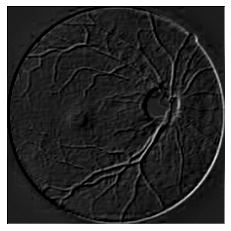

In [11]:
conv0=vgg16.features[0](img_tc)
relu1=vgg16.features[1](conv0)
num=relu1.shape[1]
for i in range(num):
    img=relu1[0][i].detach().numpy()
    max_num=img.max()
    min_num=img.min()
    test=max_num-min_num
    if test==0:
        img=img
    else:
        img=(img-min_num)*255/(max_num-min_num)
    save_path=os.path.join(path_name,'{}.jpg'.format(i))
    cv2.imencode(save_path, img)[1].tofile(save_path)
    plt.imshow(img,cmap='gray')
    plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

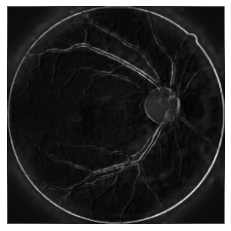

In [12]:
conv0=vgg16.features[0](img_tc)
relu1=vgg16.features[1](conv0)
num=relu1.shape[1]
image=np.zeros((224,224),dtype= np.float32)
for i in range(num):
    image+=relu1[0][i].detach().numpy()
max_num=image.max()
min_num=image.min()
test=max_num-min_num
if test==0:
    image=image
else:
    image=(image-min_num)*255/(max_num-min_num)
save_path=os.path.join(path_name,'main.jpg')
cv2.imencode(save_path, image)[1].tofile(save_path)
plt.imshow(image,cmap='gray')
plt.axis('off')

In [13]:
image.shape

(224, 224)

(-0.5, 223.5, 223.5, -0.5)

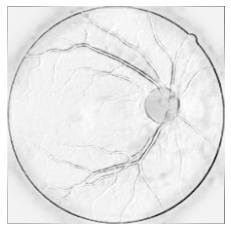

In [14]:
image2=255-image
save_path=os.path.join(path_name,'main2.jpg')
cv2.imencode(save_path, image2)[1].tofile(save_path)
plt.imshow(image2,cmap='gray')
plt.axis('off')

### 2.第二层可视化

In [15]:
path=r'D:\jupyter\ML\Project\6_visualization_2'
layer='2'
if not os.path.exists(os.path.join(path,layer)):
    os.mkdir(os.path.join(path,layer))   #目录不存在时创建mnist目录创建origin目录
path_name=os.path.join(path,layer)

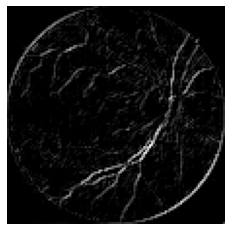

In [16]:
conv2=vgg16.features[2](relu1)
relu3=vgg16.features[3](conv2)
maxpool4=vgg16.features[4](relu3)
num=maxpool4.shape[1]
for i in range(num):
    img=maxpool4[0][i].detach().numpy()
    max_num=img.max()
    min_num=img.min()
    test=max_num-min_num
    if test==0:
        img=img
    else:
        img=(img-min_num)*255/(max_num-min_num)
    save_path=os.path.join(path_name,'{}.jpg'.format(i))
    cv2.imencode(save_path, img)[1].tofile(save_path)
    plt.imshow(img,cmap='gray')
    plt.axis('off')

(-0.5, 111.5, 111.5, -0.5)

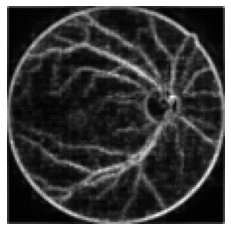

In [17]:
image=np.zeros((112,112),dtype= np.float32)
for i in range(num):
    image+=maxpool4[0][i].detach().numpy()
max_num=image.max()
min_num=image.min()
test=max_num-min_num
if test==0:
    image=image
else:
    image=(image-min_num)*255/(max_num-min_num)
save_path=os.path.join(path_name,'main.jpg')
cv2.imencode(save_path, image)[1].tofile(save_path)
plt.imshow(image,cmap='gray')
plt.axis('off')

(-0.5, 111.5, 111.5, -0.5)

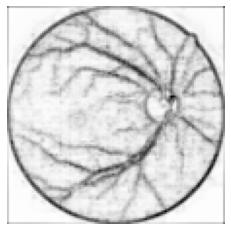

In [18]:
image2=255-image
save_path=os.path.join(path_name,'main2.jpg')
cv2.imencode(save_path, image2)[1].tofile(save_path)
plt.imshow(image2,cmap='gray')
plt.axis('off')

### 3.第三层可视化

In [19]:
path=r'D:\jupyter\ML\Project\6_visualization_2'
layer='3'
if not os.path.exists(os.path.join(path,layer)):
    os.mkdir(os.path.join(path,layer))   #目录不存在时创建mnist目录创建origin目录
path_name=os.path.join(path,layer)

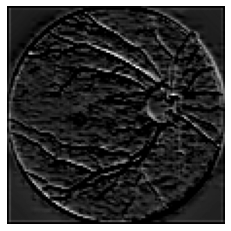

In [20]:
conv5=vgg16.features[5](maxpool4)
relu6=vgg16.features[6](conv5)
num=relu6.shape[1]
for i in range(num):
    img=relu6[0][i].detach().numpy()
    max_num=img.max()
    min_num=img.min()
    test=max_num-min_num
    if test==0:
        img=img
    else:
        img=(img-min_num)*255/(max_num-min_num)
    save_path=os.path.join(path_name,'{}.jpg'.format(i))
    cv2.imencode(save_path, img)[1].tofile(save_path)
    plt.imshow(img,cmap='gray')
    plt.axis('off')

(-0.5, 111.5, 111.5, -0.5)

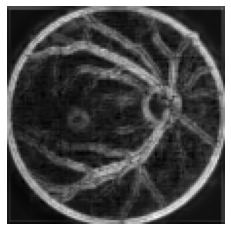

In [21]:
num=relu6.shape[1]
image=np.zeros((112,112),dtype= np.float32)
for i in range(num):
    image+=relu6[0][i].detach().numpy()
max_num=image.max()
min_num=image.min()
test=max_num-min_num
if test==0:
    image=image
else:
    image=(image-min_num)*255/(max_num-min_num)
save_path=os.path.join(path_name,'main.jpg')
cv2.imencode(save_path, image)[1].tofile(save_path)
plt.imshow(image,cmap='gray')
plt.axis('off')

(-0.5, 111.5, 111.5, -0.5)

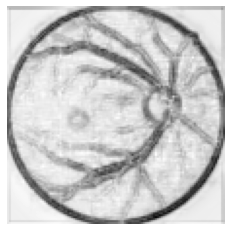

In [22]:
image2=255-image
save_path=os.path.join(path_name,'main2.jpg')
cv2.imencode(save_path, image2)[1].tofile(save_path)
plt.imshow(image2,cmap='gray')
plt.axis('off')

### 4.第四层可视化

In [23]:
path=r'D:\jupyter\ML\Project\6_visualization_2_deeper'
layer='4'
if not os.path.exists(os.path.join(path,layer)):
    os.mkdir(os.path.join(path,layer))   #目录不存在时创建mnist目录创建origin目录
path_name=os.path.join(path,layer)

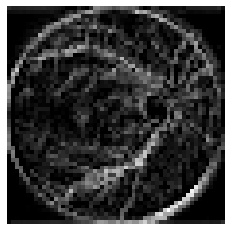

In [24]:
conv7=vgg.features[7](relu6)
relu8=vgg.features[8](conv7)
maxpool9=vgg.features[9](relu8)
num=maxpool9.shape[1]
for i in range(num):
    img=maxpool9[0][i].detach().numpy()
    max_num=img.max()
    min_num=img.min()
    test=max_num-min_num
    if test==0:
        img=img
    else:
        img=(img-min_num)*255/(max_num-min_num)
    save_path=os.path.join(path_name,'{}.jpg'.format(i))
    cv2.imencode(save_path, img)[1].tofile(save_path)
    plt.imshow(img,cmap='gray')
    plt.axis('off')

(-0.5, 55.5, 55.5, -0.5)

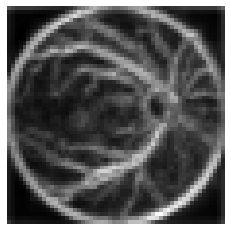

In [25]:
num=maxpool9.shape[1]
image=np.zeros((56,56),dtype= np.float32)
for i in range(num):
    image+=maxpool9[0][i].detach().numpy()
max_num=image.max()
min_num=image.min()
test=max_num-min_num
if test==0:
    image=image
else:
    image=(image-min_num)*255/(max_num-min_num)
save_path=os.path.join(path_name,'main.jpg')
cv2.imencode(save_path, image)[1].tofile(save_path)
plt.imshow(image,cmap='gray')
plt.axis('off')

(-0.5, 55.5, 55.5, -0.5)

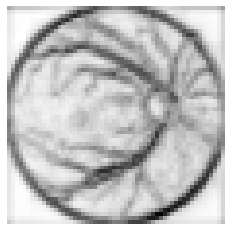

In [26]:
image2=255-image
save_path=os.path.join(path_name,'main2.jpg')
cv2.imencode(save_path, image2)[1].tofile(save_path)
plt.imshow(image2,cmap='gray')
plt.axis('off')